In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation    


class fluid_model(object):
    def __init__(self, a=-10, b=10,N=100, t_max=10.0, vel=1.0, rho=1.0):
        self.N = N + 2          # outer most ghost layer of grid for BC's 
        self.t_max = t_max
        self.vel = vel
        self.rho = rho
        
        self.delta_x = abs(b-a)/self.N
        
        self.grid = np.linspace(a,b,self.N)
        self.u = np.zeros((self.N,self.N))     ## 2D (N*N) grid
        self.u_all = []
        
        self.p = np.zeros((self.N,self.N))
        self.source = np.zeros((self.N,self.N))
        
        
    def gauss_wave(self,mu_x,mu_y,x,y,sig=2.0):
        #return np.exp(-x*x)
        return np.exp(- ( ((x-mu_x)**2 / (2.0*sig**2)) + ((y-mu_y)**2 / (2.0*sig**2)) )) 

        
    def initialize(self):
        k = self.N
        ### want gauss like curve centered around (0.4,0.4)
        for i in range(k):
            for j in range(k):
                self.u[i][j] = self.gauss_wave(0.0,0.0,self.grid[i],self.grid[j])
                
        self.source[k//4,k//4] = 100
        self.source[k*3//4,k*3//4] = -100
        

<IPython.core.display.Javascript object>


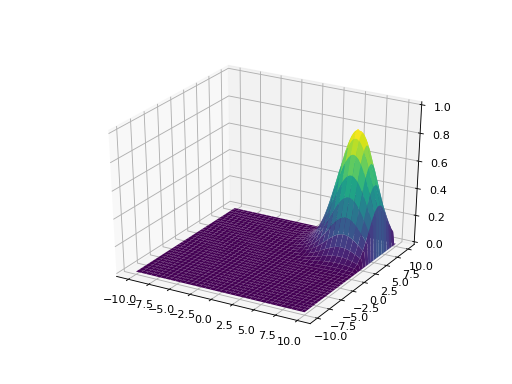

In [8]:
a = fluid_model()
a.initialize()

%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(a.grid,a.grid)                            

def surf():
    k = ax.plot_surface(X, Y, a.u[:],cmap='viridis')
    return k

def evolve_convection(frames):   # choose t to satisfy CFL condition (0.2 now)
    u_n = a.u.copy()
    k = a.N
    t = 0.2
        
    fac = a.vel * t / (2 * a.delta_x)    # fac <= 0.5
    
    u_n[1:,1:] -= fac * ((u_n[1:,1:] - u_n[1:,:-1]) + (u_n[1:,1:] - u_n[:-1,1:]))
    
    a.u = u_n
    
    a.u[0,:]= 0
    a.u[-1,:]= 0
    a.u[:,0]= 0
    a.u[:,-1]= 0
    ax.clear()
    ax.set_zlim(0,1)
    j = surf()
    return j

def evolve_diffusion(frames):
    u_n = a.u.copy()
    k = a.N
    t = 0.1
        
    fac = a.vel * t / (20 * a.delta_x**2)    
    
    u_n[1:-1,1:-1] -= fac * ( (u_n[1:-1,2:]-u_n[1:-1,1:-1]+u_n[1:-1,:-2]) \
                             + (u_n[2:,1:-1]-u_n[1:-1,1:-1]+u_n[:-2,1:-1]) )
    
    a.u = u_n
    
    a.u[0,:]= 0
    a.u[-1,:]= 0
    a.u[:,0]= 0
    a.u[:,-1]= 0
    ax.clear()
    ax.set_zlim(0,1)
    j = surf()
    return j

def poisson():
    p_n = a.p.copy()
    k = a.N
    dx = a.delta_x
    b = a.source.copy()
    
    p_n[1:-1,1:-1] = (((p_n[1:-1,2:] + p_n[1:-1,:-2]) * dx**2) +\
                      (p_n[2:,1:-1] + p_n[:-2,1:-1]) * dx**2 -\
                      (b[1:-1,1:-1] * dx**4)) / (4 * dx**2)
    p_n[0,:] = 0
    p_n[k-1,:] = 0
    p_n[:,0] = 0
    p_n[:,k-1] = 0
    
    a.p = p_n

anim = animation.FuncAnimation(fig,evolve_convection,30,repeat=True,interval=10,blit=True)
#anim = animation.FuncAnimation(fig,evolve_diffusion,12,repeat=False,interval=500,blit=False)


#### for poisson testing #####
for i in range(a.N):
    poisson()
k = ax.plot_surface(X, Y, a.p[:],cmap='viridis')
    

      
       


In [ ]:
import numpy as np
a=[[1,2,3,4,5],[2,3,6,7,8],[9,1,5,4,3]]
a=np.array(a)
print(a)
print(a[1][2])
print(a[:,:])